# 🧠 LAB1 – Raport z eksperymentów (FFNN i SOM)
---
## Instrukcja
- Uzupełnijcie notebook krok po kroku.
- Każdy eksperyment powinien zawierać opis danych, konfigurację sieci, wyniki i komentarz.
- **Łącznie: 4 eksperymenty (2 zbiory × FFNN i SOM).**
- Jeśli zbiór jest mały → zastosujcie **k-fold cross-validation (np. k=5)**.
- Raport zakończcie podsumowaniem i porównaniem FFNN vs SOM.


## 🔹 Eksperyment 1 – Zbiór A + FFNN
### Opis zbioru danych
- liczba próbek, liczba cech, klasy
- trudności / balans klas


In [3]:
# TODO: Załaduj zbiór danych A
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

train_df = pd.read_csv('SPECT.train', header=None)
test_df = pd.read_csv('SPECT.test', header=None)

print(f"Training data shape: {train_df.shape}")
print(f"Test data shape: {test_df.shape}")
print(f"\nFirst few rows:\n{train_df.head()}")

spect_df = pd.concat([train_df, test_df], ignore_index=True)

print(f"\nCombined data shape: {spect_df.shape}")

Training data shape: (80, 23)
Test data shape: (187, 23)

First few rows:
   0   1   2   3   4   5   6   7   8   9   ...  13  14  15  16  17  18  19  \
0   1   0   0   0   1   0   0   0   1   1  ...   1   1   0   0   0   0   0   
1   1   0   0   1   1   0   0   0   1   1  ...   1   1   0   0   0   0   0   
2   1   1   0   1   0   1   0   0   1   0  ...   1   0   0   0   0   0   0   
3   1   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   
4   1   0   0   0   0   0   0   0   1   0  ...   1   0   1   1   0   0   0   

   20  21  22  
0   0   0   0  
1   0   0   1  
2   0   0   0  
3   1   1   1  
4   0   0   0  

[5 rows x 23 columns]

Combined data shape: (267, 23)


In [8]:
# TODO: Podziel dane na train/val/test lub zastosuj k-fold cross-validation

X = spect_df.iloc[:, 1:].values
y = spect_df.iloc[:, 0].values

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)




In [9]:
# TODO: Zbuduj i wytrenuj sieć FFNN
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    # Input layer + First hidden layer
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),

    layers.Dense(32, activation='relu'),

    # Output layer
    layers.Dense(2, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_val, y_val))


Epoch 1/50


C:\Users\galek\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.1989 - loss: 0.9353 - val_accuracy: 0.3000 - val_loss: 0.7857
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.4785 - loss: 0.7003 - val_accuracy: 0.7000 - val_loss: 0.6053
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7688 - loss: 0.5628 - val_accuracy: 0.7500 - val_loss: 0.5078
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7957 - loss: 0.4803 - val_accuracy: 0.7500 - val_loss: 0.4574
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7957 - loss: 0.4330 - val_accuracy: 0.7500 - val_loss: 0.4339
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7957 - loss: 0.4048 - val_accuracy: 0.7500 - val_loss: 0.4272
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7957 - loss: 0.3945 - val_accuracy: 0.7500 - val_loss: 0.4277
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7957 - loss: 0.3868 - val_accuracy: 0.7500 - val_loss: 0.4301
Epoch 9/50


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step

EVALUATION ON TEST SET
Test set size: 41 samples

Confusion Matrix:
[[ 4  3]
 [ 1 33]]

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.57      0.67         7
           1       0.92      0.97      0.94        34

    accuracy                           0.90        41
   macro avg       0.86      0.77      0.80        41
weighted avg       0.90      0.90      0.90        41



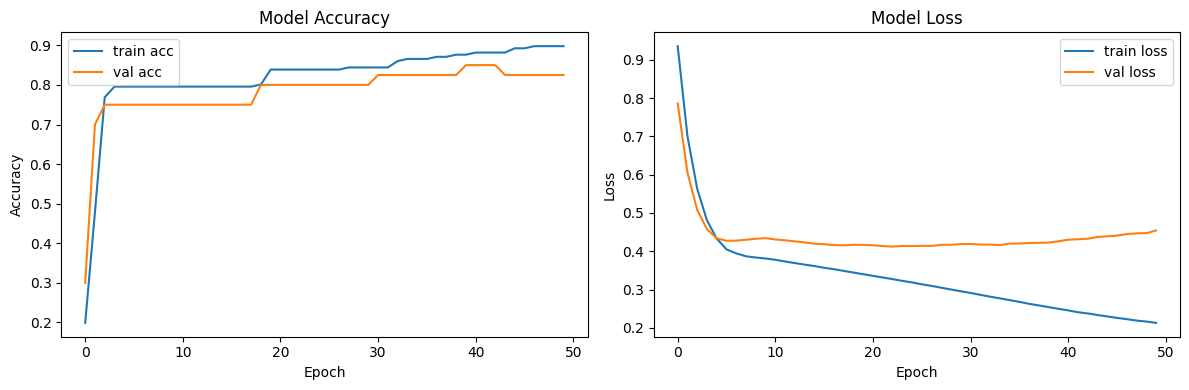

In [10]:
# TODO: Ewaluacja FFNN
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt

y_pred = model.predict(X_test).argmax(axis=1)

print("\n" + "="*50)
print("EVALUATION ON TEST SET")
print("="*50)
print(f"Test set size: {len(y_test)} samples")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Loss')

plt.tight_layout()
plt.show()

### Komentarz do wyników
- Czy sieć dobrze klasyfikuje dane?
- Jak wygląda macierz pomyłek?
- Czy pojawiło się overfitting / underfitting?


## 🔹 Eksperyment 2 – Zbiór A + SOM
### Opis zbioru danych
- liczba próbek, liczba cech, klasy
- trudności / balans klas


In [ ]:
# TODO: Implementacja lub użycie biblioteki SOM
# 🔔 Przypomnienie: heurystyka doboru rozmiaru mapy była omawiana na wykładzie.
# np. rozmiar ~ 5*sqrt(N), gdzie N = liczba próbek

# przykład (MiniSom):
# from minisom import MiniSom
# som = MiniSom(x=10, y=10, input_len=X.shape[1], sigma=1.0, learning_rate=0.5)
# som.train_random(X, 200)


In [ ]:
# TODO: Oblicz i pokaż metryki SOM
# - błąd kwantyzacji
# - błąd topograficzny
# - wizualizacja mapy (U-matrix, kolory klas)


### Komentarz do wyników
- Czy klasy są dobrze rozdzielone na mapie?
- Jakie są wartości błędów kwantyzacji i topograficznego?
- Czy SOM pokazuje coś, czego FFNN nie uchwycił?


## 🔹 Eksperymenty 3 i 4 – Zbiór B (analogicznie)


## 🔹 Podsumowanie
- Porównanie FFNN i SOM dla obu zbiorów.
- W jakich przypadkach FFNN działa lepiej, a w jakich SOM?
- Refleksja: co było najtrudniejsze, czego się nauczyliście.
